# Title of Machine Learning Project: Appliances Energy Prediction Model
--------------------------------------------------------------------------
### Name         : SANAL KUMAR B
### Organization : Entry Elevate
### Date         : 25/09/2024
--------------------------------------------------------------------------


# 1. Overview of Problem Statement: 
Experimental data used to create regression models of appliances energy use in a low energy building.

# 2. Objective:
The objective of this dataset is to predict the energy consumption of appliances in a house based on features like weather conditions and time-related variables. The goal is to build regression models that accurately predict energy usage.

# 3. Data Description: 
### Source: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
## Features: 

### Given Dataset consists of 29 features and 19,735 rows. Appliances is considering as Target Variables.

1. date             : Time year-month-day hour:minute:second
2. Appliances       : energy use in Wh
3. lights           : energy use of light fixtures in the house in Wh
4. T1               : Temperature in kitchen area, in Celsius
5. RH_1             : Humidity in kitchen area, in %
6. T2               : Temperature in living room area, in Celsius
7. RH_2             : Humidity in living room area, in %
8. T3               : Temperature in laundry room area
9. RH_3             : Humidity in laundry room area, in %
10. T4              : Temperature in office room, in Celsius
11. RH_4            : Humidity in office room, in %
12. T5              : Temperature in bathroom, in Celsius
13. RH_5            : Humidity in bathroom, in %
14. T6              : Temperature outside the building (north side), in Celsius
15. RH_6            : Humidity outside the building (north side), in %
16. T7              : Temperature in ironing room , in Celsius
17. RH_7            : Humidity in ironing room, in %
18. T8              : Temperature in teenager room 2, in Celsius
19. RH_8            : Humidity in teenager room 2, in %
20. T9              : Temperature in parents room, in Celsius
21. RH_9            : Humidity in parents room, in %
22. To_out          : Temperature outside (from Chievres weather station), in Celsius
23. Pressure_mm_Hg  : (from Chievres weather station), in mm Hg
24. RH_out          : Humidity outside (from Chievres weather station), in %
25. Windspeed       : (from Chievres weather station), in m/s
26. Visibility      : (from Chievres weather station), in km
27. Tdewpoint       : (from Chievres weather station), Â°C
28. rv1             : Random variable 1, nondimensional
29. rv2             : Random variable 2, nondimensional


### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


# 4. Data Collection
Insigts: The Appliances Energy Prediction Dataset highlights the close relationship between environmental factors (temperature, humidity, weather conditions) and household energy consumption. By analyzing these variables, machine learning models can help forecast energy needs, leading to smarter energy usage and potential reductions in electricity bills.

In [54]:
# import/load dataset by using pandas module 
data=pd.read_csv("energydata_complete.csv")

In [55]:
# Transform Data into DataFrame
df=pd.DataFrame(data)

### 5. DataPreprocessing- Data Cleaning

In [56]:
# Inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Insights: from the above details, there are 26 float type variabels, 2 integer variables and 1 object. 
No. of rows and columns are 19,735 and 29 respectively.  And there are no null values in dataset.

In [57]:
# To view the statistical Analysis ie, mean, std, min, max 25%,50%,75%, count etc....
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Insights: Can understand the values of count, mean, std, min, max, 25%, 50%, 75% of integer type features.

In [58]:
df.columns  # To view all columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [59]:
# to view the number of rows and columns of dataset
a=df.shape
print(a)
print('Number of rows = ',df.shape[0])
print('Number of columns =', df.shape[1])

(19735, 29)
Number of rows =  19735
Number of columns = 29


In [60]:
# To check for Nan values in each features. 
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Insights:  There are no Nan (Not a Number) values.

In [61]:
# To check for null values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Insights: There are no Null values in any columns
### So no imputation techniques required in this dataset (Eg: SimpleImputer Class)

In [62]:
# To check for duplicate data
i=df.duplicated().sum()
print('Number of duplicate data is ',i)

Number of duplicate data is  0


Insights: There are no duplicate data.

In [63]:
# To view first 5 rows of dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## To check the outliers in dataset

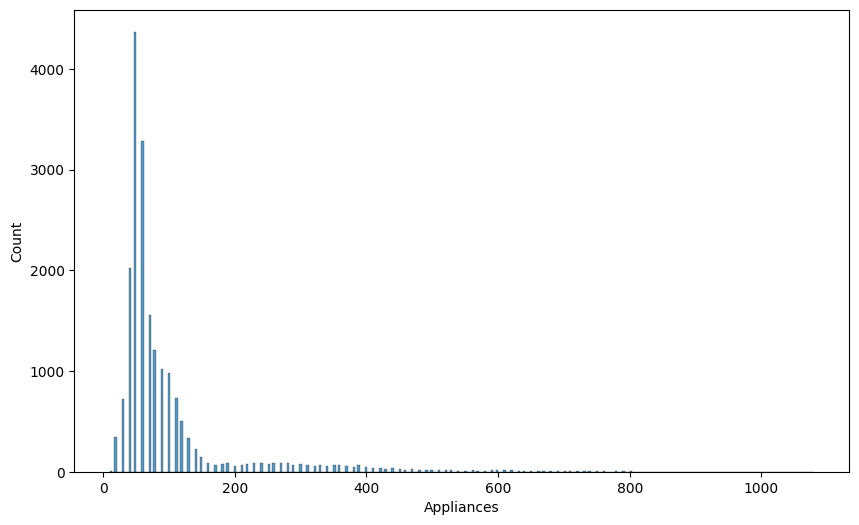

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(df['Appliances'])
plt.show()

Insight: Graph is skewed to right side, so can say its +ve skewed dataset.

In [65]:
# Removing date column from dataset 
df.drop(columns=['date'],inplace=True)
print('Dataframe after removing date column permanantly\n')
df.head()

Dataframe after removing date column permanantly



,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [66]:
# To change the column heading 
df.rename(columns={'Appliances':'Energy_Usage'}, inplace=True)

In [67]:
df.head()

,Energy_Usage,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


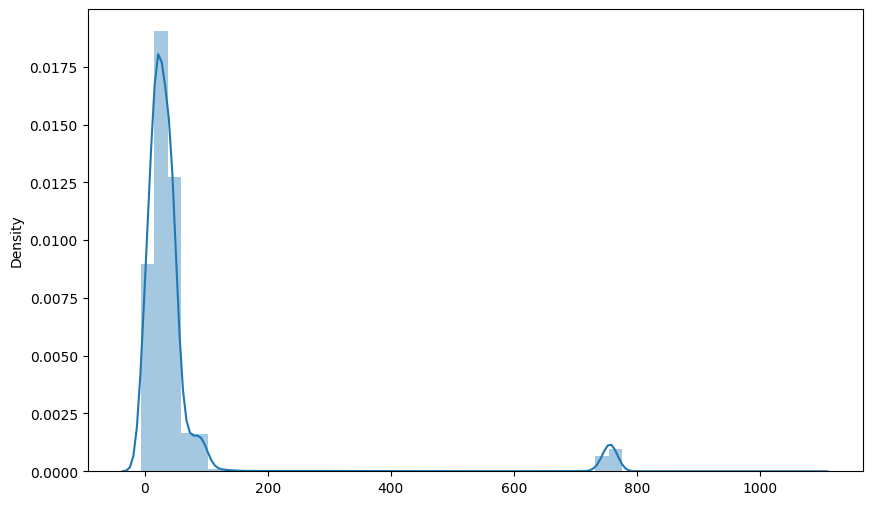

In [68]:
plt.figure(figsize=(10,6))
sns.distplot(df)
plt.show()

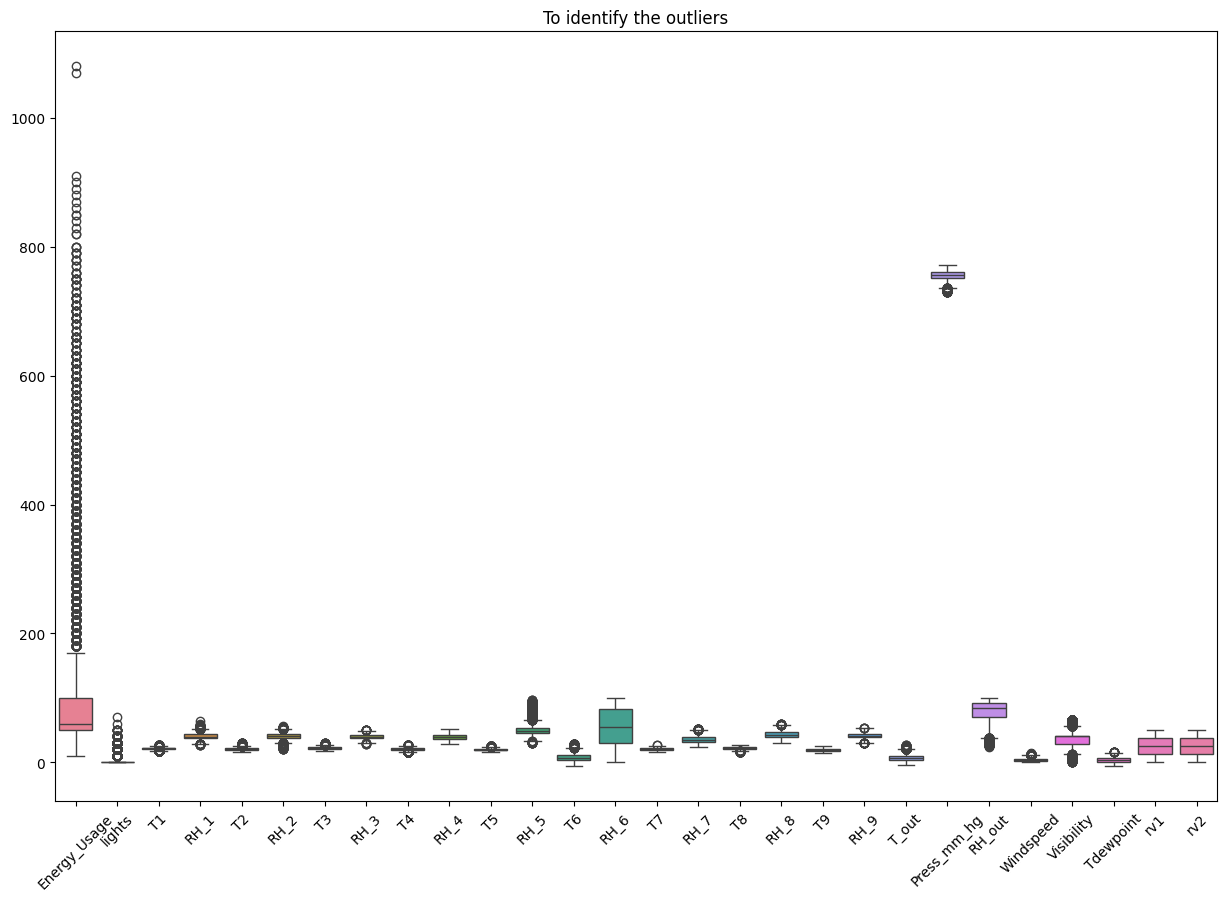

In [69]:
# To view outliers clearly

plt.figure(figsize=(15,10))
#sns.boxplot(data=df)
sns.boxplot(df)
plt.title('To identify the outliers')
plt.xticks(rotation=45)
plt.show()

 Insights:  There are outliers in most of the features.

## Outlier detection by using IQR (Inter Quartile Range)

In [161]:
# Detecting Outliers using IQR

# Define function for handling outlier using IQR

def handle_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)
        
        # Cap the outliers using capping (Winsorizing)
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
        
    return df


df1=handle_outliers_iqr(df)    
  


In [71]:
df1

,Energy_Usage,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,0.0,19.89,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,735.933333,92.000000,7.000000,56.500000,5.300000,13.275433,13.275433
1,60.0,0.0,19.89,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,735.933333,92.000000,6.666667,56.500000,5.200000,18.606195,18.606195
2,50.0,0.0,19.89,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,735.933333,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50.0,0.0,19.89,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,735.933333,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60.0,0.0,19.89,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,735.933333,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.36,46.560000,25.565000,42.025714,27.040000,41.163333,24.700000,45.590000,...,23.200000,46.7900,20.520833,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90.0,0.0,25.36,46.500000,25.565000,42.080000,27.040000,41.223333,24.700000,45.590000,...,23.200000,46.7900,20.520833,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,175.0,0.0,25.36,46.596667,25.565000,42.768571,27.040000,41.690000,24.700000,45.730000,...,23.200000,46.7900,20.520833,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,175.0,0.0,25.36,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,20.520833,755.200000,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


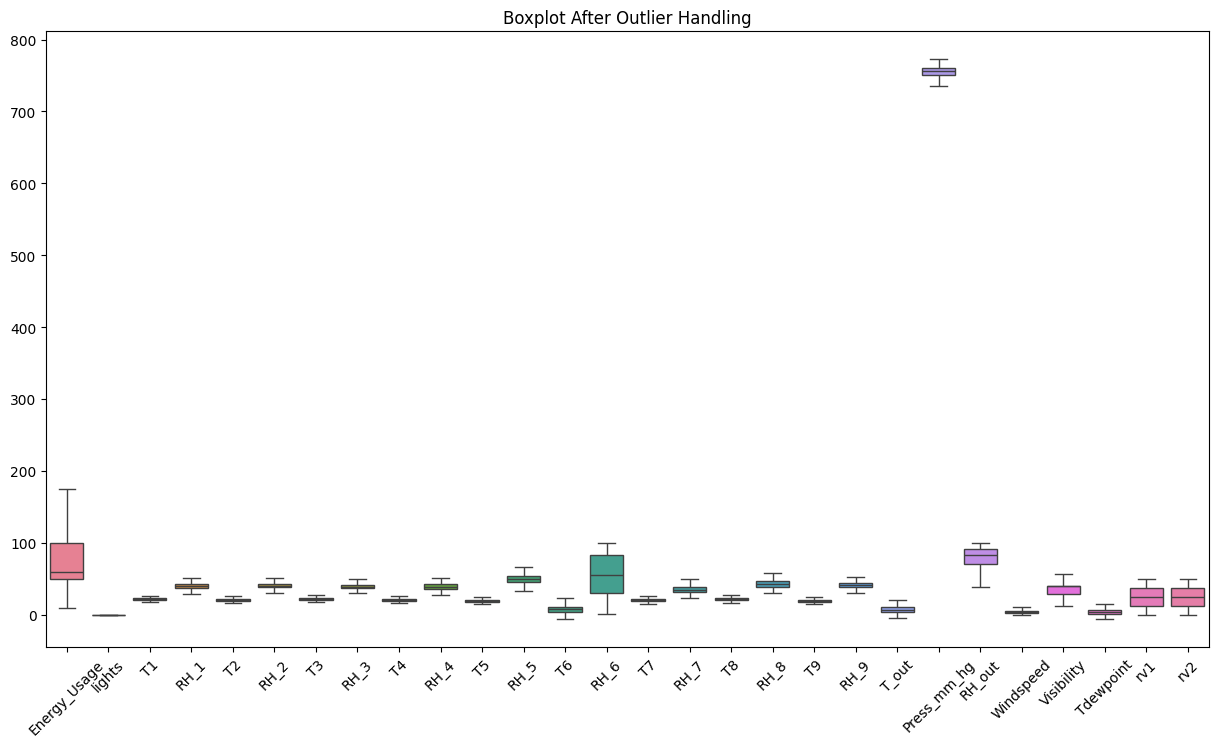

In [72]:
# Visualize the cleaned data after outlier treatment
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1)
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=45)
plt.show()

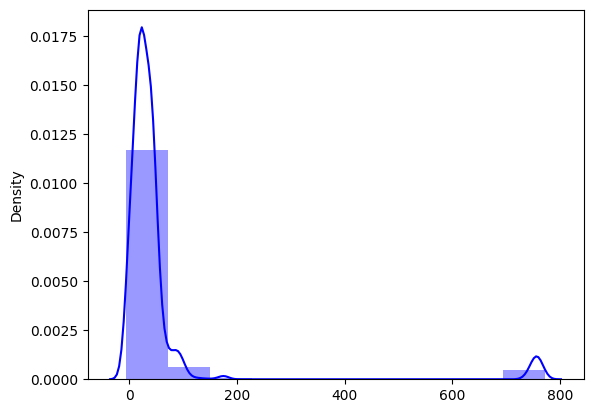

In [73]:
sns.distplot(df1, kde=True, bins=10, color='blue')
plt.show()

# 6. Exploratory Data Analysis

Skewness values:

A skewness between -0.5 and 0.5 is approximately symmetric.
A positive skewness indicates a right-skewed distribution.
A negative skewness indicates a left-skewed distribution.

In [74]:
# Check skewness of numerical columns
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns
#numerical_features
print(df1[numerical_features].skew())

Energy_Usage    1.156157
lights          0.000000
T1              0.166939
RH_1            0.401822
T2              0.634604
RH_2           -0.146187
T3              0.383435
RH_3            0.466830
T4              0.192775
RH_4            0.444614
T5              0.534076
RH_5            0.734540
T6              0.456428
RH_6           -0.241961
T7              0.254697
RH_7            0.237275
T8             -0.246628
RH_8            0.305941
T9              0.382711
RH_9            0.370684
T_out           0.398211
Press_mm_hg    -0.338726
RH_out         -0.846254
Windspeed       0.790130
Visibility      0.157975
Tdewpoint       0.239017
rv1             0.004945
rv2             0.004945
dtype: float64


## Visualization

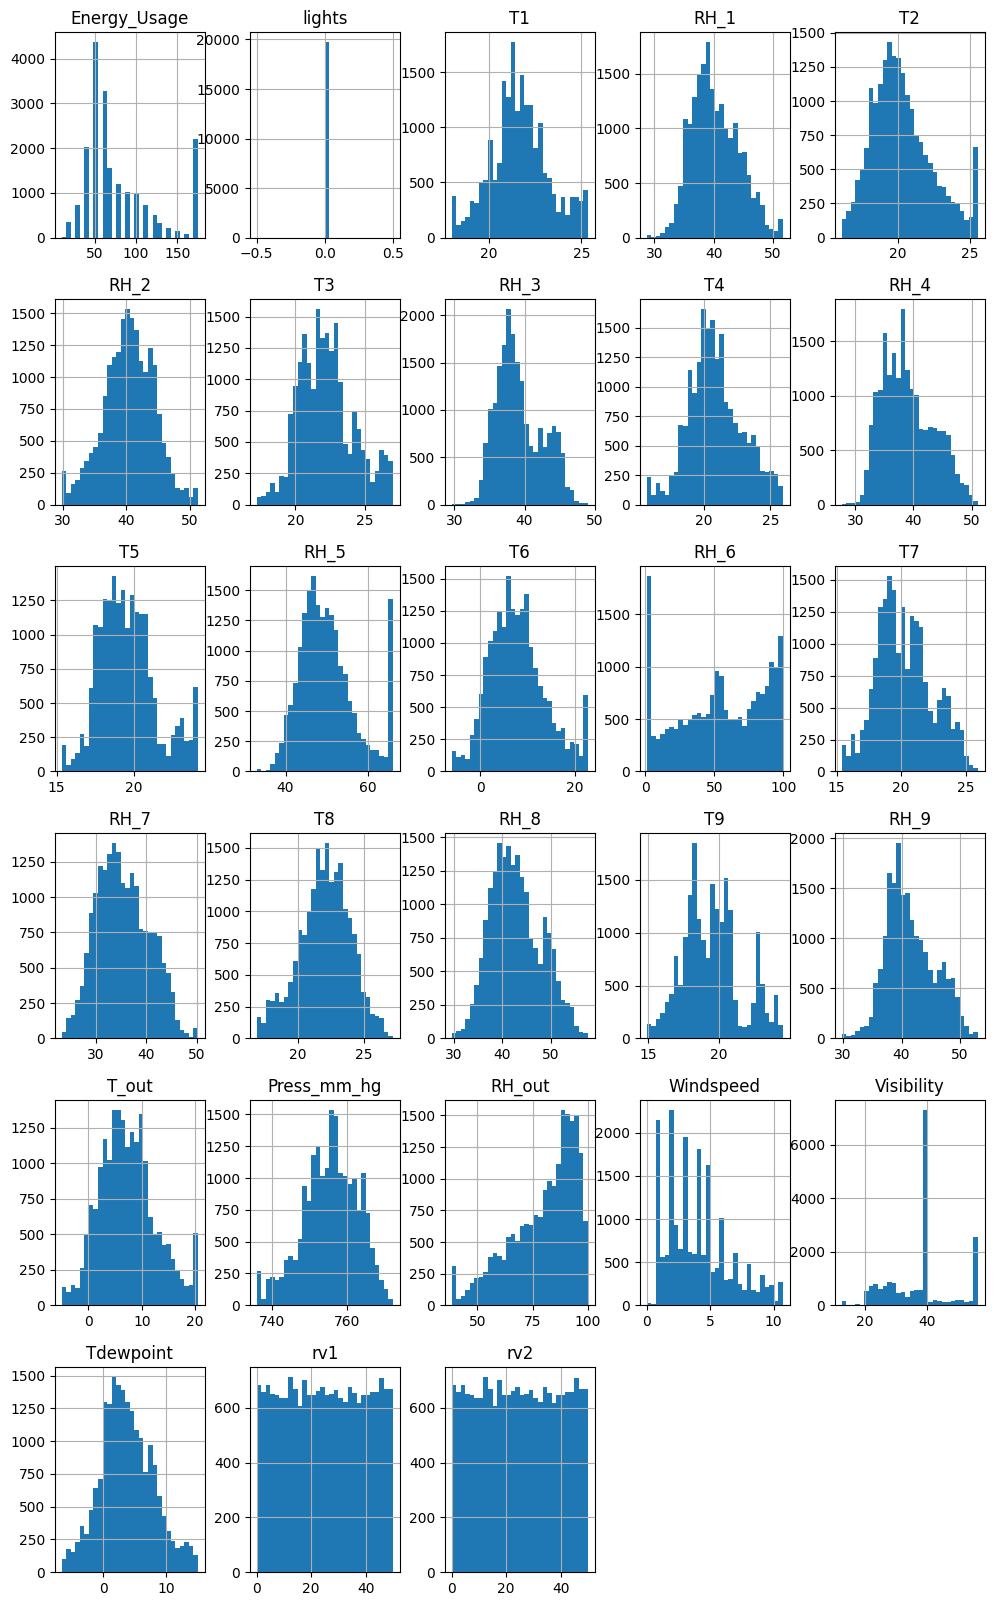

In [75]:
# Plot histograms before transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()


Insights: There are +skewness to almost all features

In [77]:
# Apply Yeo-Johnson transformation (works for both positive and negative values)
pt = PowerTransformer(method='yeo-johnson')
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

print(df1[numerical_features].skew())

Energy_Usage    0.005534
lights          0.000000
T1             -0.000159
RH_1            0.005847
T2              0.022846
RH_2           -0.000620
T3              0.004755
RH_3            0.029135
T4             -0.000010
RH_4            0.032063
T5              0.003958
RH_5            0.010572
T6              0.077813
RH_6           -0.425103
T7              0.001656
RH_7           -0.004790
T8             -0.016761
RH_8            0.003277
T9              0.007446
RH_9            0.005476
T_out           0.047332
Press_mm_hg    -0.020158
RH_out         -0.253118
Windspeed      -0.008516
Visibility     -0.024609
Tdewpoint       0.030371
rv1            -0.244695
rv2            -0.244695
dtype: float64


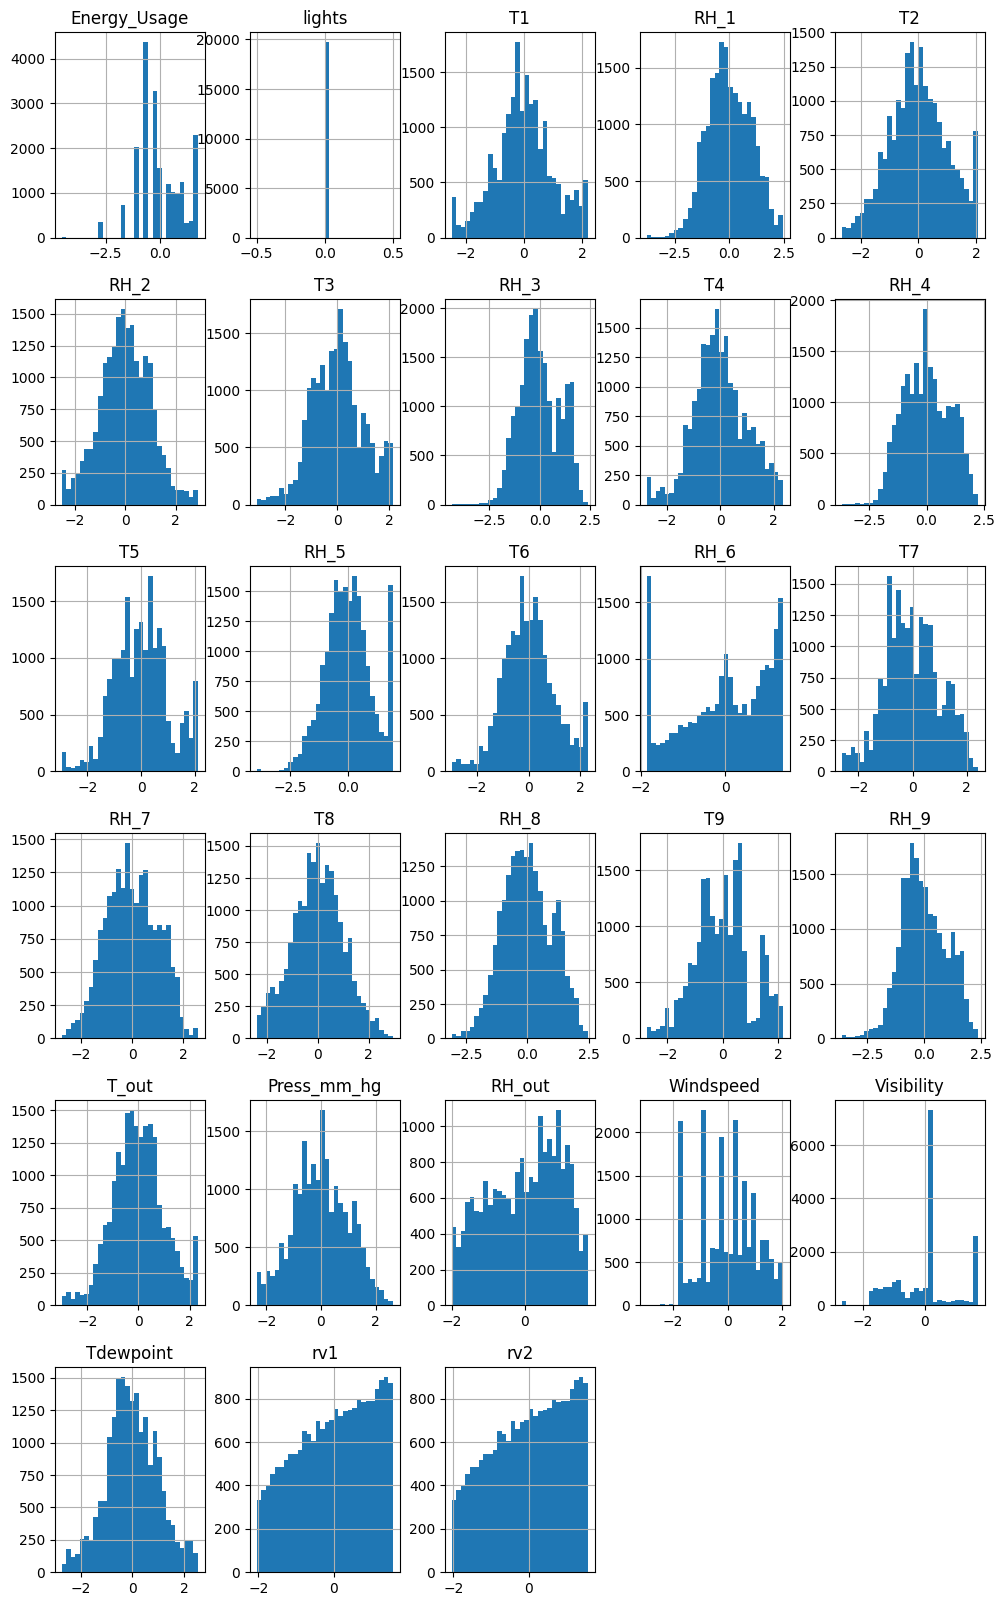

In [78]:
# Plot histograms after transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()


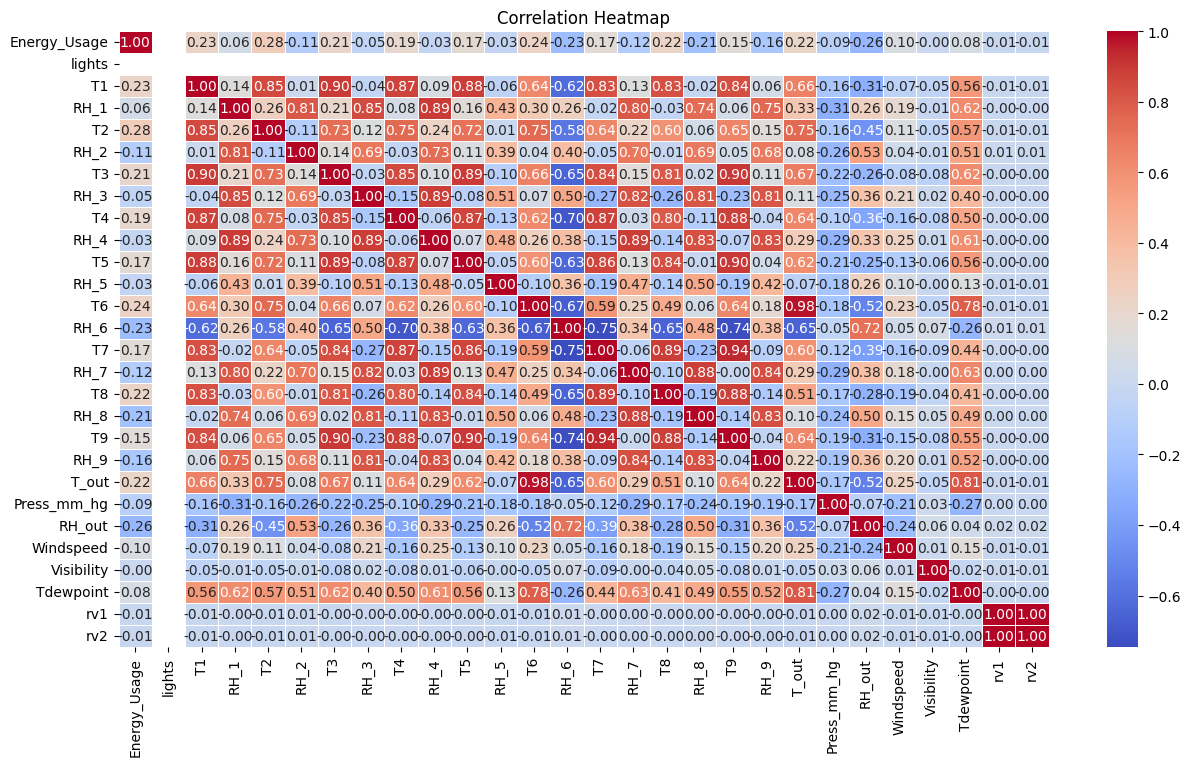

In [79]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Create count plot for Temperature_Range

plt.figure(figsize=(8, 6))
sns.countplot(x='T_ave',hue="Appliances", data=df1, palette='viridis')
plt.title('Count Plot of Temperature Ranges')
plt.xlabel('Temperature Range')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Density')

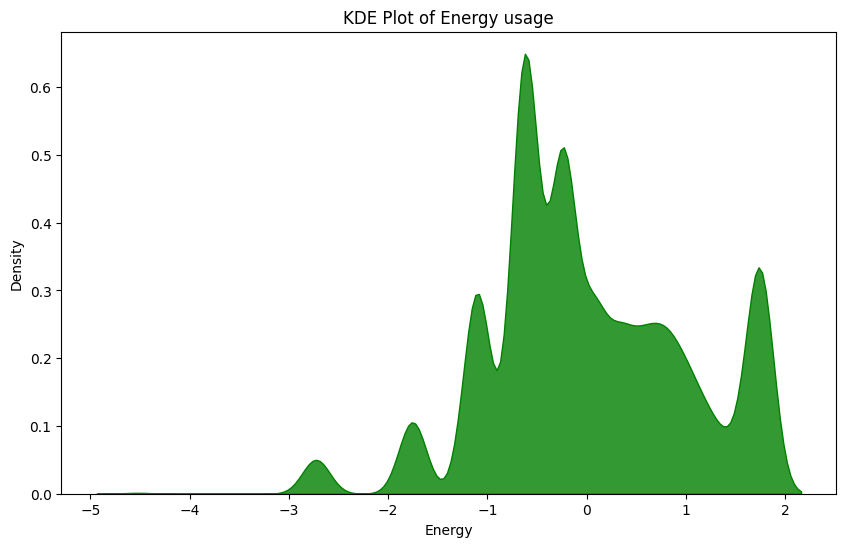

In [100]:
# Creating the KDE plot

plt.figure(figsize=(10, 6))  # Set the figure size
sns.kdeplot(data=df1['Energy_Usage'], fill=True, color='green', alpha=0.8)

# Adding titles and labels
plt.title('KDE Plot of Energy usage')
plt.xlabel('Energy')
plt.ylabel('Density')

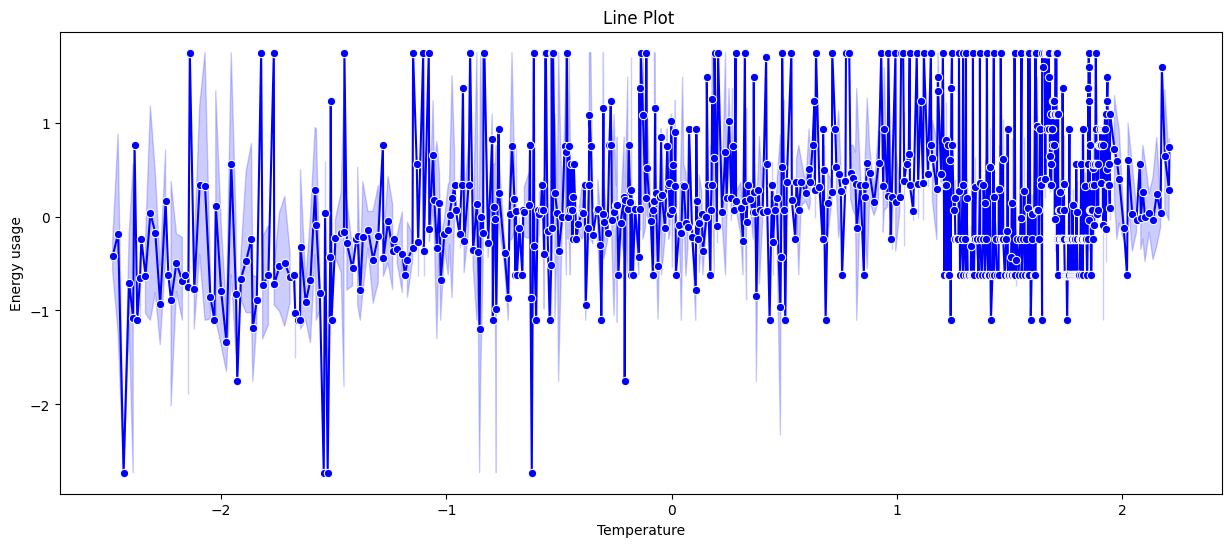

In [105]:
# Creating the line plot

plt.figure(figsize=(15, 6))  # Set figure size
sns.lineplot(data=df, x=df1.T1, y=df1.Energy_Usage, marker='o', color='blue')

# Adding titles and labels
plt.title('Line Plot ')
plt.xlabel('Temperature')
plt.ylabel('Energy usage')

# Display the plot
#plt.grid()  # Show grid
plt.show()

# 7. Feature Engineering

In [107]:
# Data stored to df1 after dropping unwanted features
df1=df1.drop(columns=['rv1','rv2'])

In [108]:
df1 # df1 is the dataframe after done feature engineering

,Energy_Usage,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,-0.240595,0.0,-1.150056,1.717942,-0.454658,1.101118,-1.310485,1.550741,-0.908695,1.415752,...,-1.854302,1.132131,-1.280966,0.976410,-0.091021,-2.352372,0.878538,1.196112,1.727391,0.390806
1,-0.240595,0.0,-1.150056,1.539380,-0.454658,1.083242,-1.310485,1.563816,-0.908695,1.487005,...,-1.854302,1.126058,-1.260487,0.982727,-0.113215,-2.352372,0.878538,1.105732,1.727391,0.367900
2,-0.620965,0.0,-1.150056,1.459852,-0.454658,1.057886,-1.310485,1.594856,-0.947131,1.469981,...,-1.854302,1.103933,-1.301507,0.970088,-0.135460,-2.352372,0.878538,1.011588,1.627096,0.344969
3,-0.620965,0.0,-1.150056,1.412150,-0.454658,1.048192,-1.310485,1.609200,-0.966386,1.442129,...,-1.897071,1.080626,-1.301507,0.948966,-0.157757,-2.352372,0.878538,0.913340,1.293527,0.322013
4,-0.240595,0.0,-1.150056,1.466635,-0.454658,1.032336,-1.310485,1.609200,-0.966386,1.409551,...,-1.897071,1.080626,-1.301507,0.948966,-0.180106,-2.352372,0.878538,0.810601,0.953339,0.299032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.758242,0.0,2.210869,1.512545,2.061339,0.379879,2.137893,0.676894,1.813693,1.419693,...,1.417390,1.323846,1.701885,1.236239,2.330521,-0.114183,-1.534519,-0.083185,-1.383544,2.174502
19731,0.560135,0.0,2.210869,1.500428,2.061339,0.393828,2.137893,0.693336,1.813693,1.419693,...,1.417390,1.277944,1.701885,1.236239,2.330521,-0.114183,-1.521899,-0.005830,-1.294247,2.167273
19732,1.744721,0.0,2.210869,1.519937,2.061339,0.571509,2.137893,0.819003,1.813693,1.443247,...,1.417390,1.256833,1.701885,1.236239,2.330521,-0.114183,-1.509132,0.068883,-1.205732,2.160042
19733,1.744721,0.0,2.210869,1.598642,2.019912,0.640893,2.082600,0.711529,1.813693,1.453295,...,1.395731,1.233822,1.701885,1.241788,2.330521,-0.114183,-1.496217,0.141133,-1.117966,2.152810


In [109]:
print('Shape of dataframe after feature engineering', df1.shape)

Shape of dataframe after feature engineering (19735, 26)


In [110]:
print('No. of rows before FE =',df.shape[0])
print('No. of Cols before FE=',df.shape[1])

print('No. of rows after FE=',df1.shape[0])
print('No. of Cols after FE=',df1.shape[1])

No. of rows before FE = 19735
No. of Cols before FE= 28
No. of rows after FE= 19735
No. of Cols after FE= 26


## All features are in integer and float type, so no need to encoding. Encoding is apply only dataset having categorical data (LabelEncoding, OneHotEncoding)

# 8. Feature Selection

In [141]:
# Separate the target and independant features
X = df1.drop(columns=['Energy_Usage'])  # Assuming 'Energy_Usage' is the target
y = df1['Energy_Usage']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Initialize and fit the RandomForest algorithams for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)


In [ ]:
# Get feature importances
feature_importances = model.feature_importances_
feature_importancesre.count()

# 9. Split data into training and testing sets

In [134]:
# Separate the target and independant features
X = df1.drop(columns=['Energy_Usage'])  # Assuming 'Energy_Usage' is the target
y = df1['Energy_Usage']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# 10. Feature Scaling

In [135]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df1)


In [151]:
X_scaled

array([[0.68330661, 0.        , 0.28379633, ..., 0.83377463, 1.        ,
        0.59199985],
       [0.68330661, 0.        , 0.28379633, ..., 0.81561302, 1.        ,
        0.58766937],
       [0.62263078, 0.        , 0.28379633, ..., 0.79669493, 0.97723262,
        0.58333428],
       ...,
       [1.        , 0.        , 1.        , ..., 0.60726021, 0.33417362,
        0.92647249],
       [1.        , 0.        , 1.        , ..., 0.62177874, 0.35409659,
        0.92510531],
       [1.        , 0.        , 1.        , ..., 0.63583497, 0.37385589,
        0.92373793]])

In [136]:
# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances

lights         0.000000
T1             0.021857
RH_1           0.061184
T2             0.108772
RH_2           0.030287
T3             0.037387
RH_3           0.041566
T4             0.035536
RH_4           0.037179
T5             0.030442
RH_5           0.037520
T6             0.036303
RH_6           0.036888
T7             0.033165
RH_7           0.038196
T8             0.049327
RH_8           0.075022
T9             0.026054
RH_9           0.053639
T_out          0.028345
Press_mm_hg    0.049470
RH_out         0.056289
Windspeed      0.023120
Visibility     0.017113
Tdewpoint      0.035339
dtype: float64

In [143]:
feature_importances.count()

25

In [155]:
df.shape

(19735, 28)

In [158]:
len(df.columns)

28

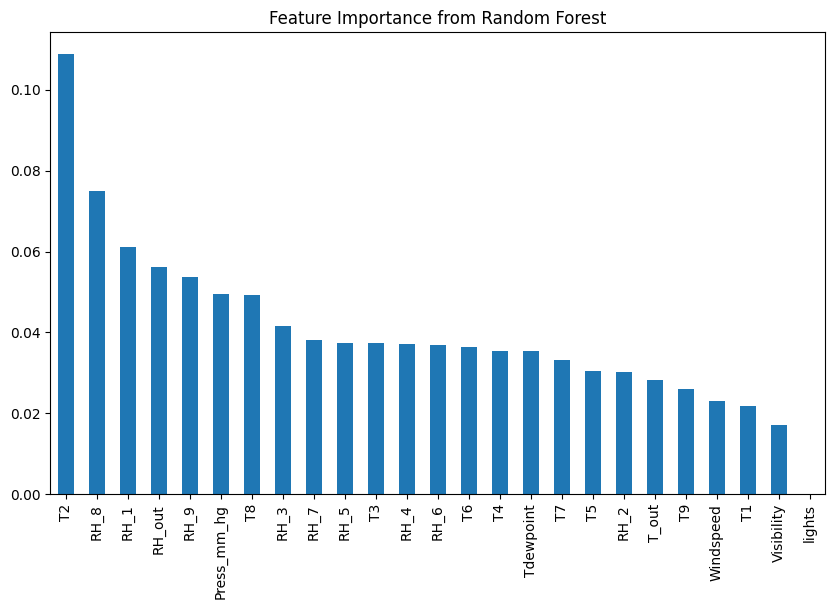

In [137]:
# Sort and plot the top features
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

In [140]:
# Separate the target and independant features
X = feature_importances  # Assuming 'Energy_Usage' is the target
y = df1['Energy_Usage']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [25, 19735]

# 11. Build the ML Models and
# 12. Model Evaluation

In [139]:
# Initialize the dictionary to store models and their evaluation

models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
}

results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled,y_train)  
    # make the prediction
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "R²": r2,"MAE":mae,"RMSE":rmse}

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# 13. Hyperparameter Tuning

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# 2. Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
data = pd.read_csv(url)

# 3. Inspect the dataset
print(data.info())
print(data.describe())

# 4. Data Preprocessing
# Drop the date column (non-numeric)
data.drop(columns=['date'], inplace=True)

# Check for missing values
print(data.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
features = data.drop(columns=['Appliances'])  # Independent variables
target = data['Appliances']  # Dependent variable

features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# 5. Model Training and Evaluation

# Helper function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_mae, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test)

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_mae, dt_rmse, dt_r2 = evaluate_model(dt_model, X_test, y_test)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_mae, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)

# 4. Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_mae, gbr_rmse, gbr_r2 = evaluate_model(gbr_model, X_test, y_test)

# 5. Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_mae, svr_rmse, svr_r2 = evaluate_model(svr_model, X_test, y_test)

# 6. Print Results
print("Model Performance:")
print(f"Linear Regression - MAE: {lr_mae}, RMSE: {lr_rmse}, R²: {lr_r2}")
print(f"Decision Tree Regressor - MAE: {dt_mae}, RMSE: {dt_rmse}, R²: {dt_r2}")
print(f"Random Forest Regressor - MAE: {rf_mae}, RMSE: {rf_rmse}, R²: {rf_r2}")
print(f"Gradient Boosting Regressor - MAE: {gbr_mae}, RMSE: {gbr_rmse}, R²: {gbr_r2}")
print(f"Support Vector Regressor - MAE: {svr_mae}, RMSE: {svr_rmse}, R²: {svr_r2}")
